## Exercise in Photogrammetry I
## **Ex.3 : Histograms and Image Transformations**
### Hand out: xx.xx.xxxx
### Submission: xx.xx.xxxx 
### Points: 17

## A. Histogram Basics *(10 points)*
In this exercise, you will learn how to apply image transformations and how to compute histograms. Whenever you define a **function** write a **docstring** which gives details about the function itself as well as input and output.

For example: 
```
def my_function(arg1, arg2):
    """ Explain what your function does.

    Args:
        arg1: Explain the first argument.
        arg2: Explain the second argument.

    Returns:
        Give details about the return value.
    """
    ...
    return True
```

**Tasks:**
1. import all necessary modules to modify, load and visualize images *(0 points)*
2. Load ```images/cube.jpg``` as a **grayscale** image. Make sure that the pixels are within [0, 255] and the underlying datatype is *uint8*. Finally visualize the image and print out its minimum and maximum value as well as its data type. *(2 points)*
3. Define a **function** ```histogram(image)``` which takes as input an image [np.array] and returns its histogram [np.array]. The histogram should have 256 bins. Do not use built-in python functions which compute the histogram for you! *(3 points)*
4. Define a **function** ```cumulativeHistogram(hist)``` which takes as input a histogram [np.array] and returns the cumulative histogram [np.array]. The histogram should have 256 bins as well. *(3 points)*
5. **Compute** the **histogram** and **cumulative histogram** of the grayscale cube image by calling your previously defined functions. <br>Finally, **plot** the results and assign proper **labels** to both **axis**. *(2 points)*
<br>**Hint:** use ```plt.bar(...)``` for the histogram and ```plt.plot(...)``` for the cumulative histogram.

In [8]:
# 1. Import modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import skimage.io
from skimage import img_as_ubyte
import math

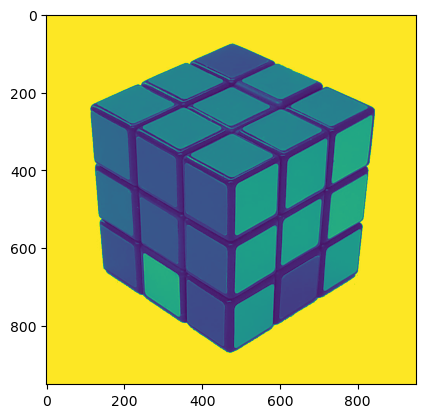

In [2]:
# 2. Load and visualize image
im = skimage.io.imread('images/cube.jpg', as_gray=True)

im = (im * 255).astype(np.uint8)

plt.imshow(im)

In [3]:
# Print out the minimum and maximum value of the displayed image as well as its data type
print(im.dtype, np.min(im), np.max(im))

uint8 0 255


In [4]:
# 3. Define your function called histogram(image) here:
def histogram(image):
    
    """The function takes as input an image [np.array] and returns its histogram [np.array]"""
    
    histogram = np.zeros((256,1))
    
    for i in range(256):
        
        histogram[i] = len(image[image == i])
        
    return histogram

In [5]:
# 4. Define your function called cumulativeHistogram(hist) here:
def cumulativeHistogram(hist):
    
    """The function takes as input a histogram [np.array] and returns the cumulative histogram [np.array]"""
    
    cum_hist = np.zeros((256,1))
    
    for i in range(256):
        
        cum_hist[i] = sum(hist[:i+1])
        
    return cum_hist

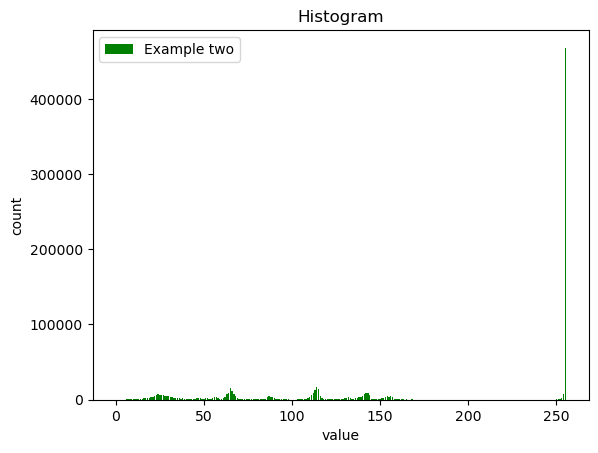

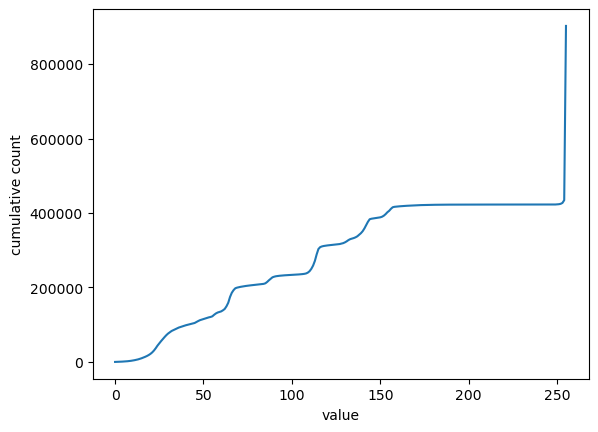

In [6]:
# 5. Compute the histogram and cumulative Histogram
hist = histogram(im)
cum_hist = cumulativeHistogram(hist)

plt.bar(np.arange(256),hist[:,0], label="Example two", color='g')
plt.legend()
plt.xlabel('value')
plt.ylabel('count')

plt.title('Histogram')

plt.show()

plt.plot(np.arange(256), cum_hist[:,0])
plt.xlabel('value')
plt.ylabel('cumulative count')
plt.show()


## B. Histogram Equalization *(7 points)*
You have learned the concept for **histogram equalization** in the lecture. It transforms the image such that all intensities are used equally often. 

**Tasks:**
1. Define a **function** ```imageEqualization(image)``` which takes an image as input and returns the transformed image after applying the histogram equalization. *(3 points)*
2. **Compute** the **equalized** grayscale **cube image** and **visualize** it next to the original image. Set the title of each image properly. **Explain** your **observations** in the markdown cell below. *(2 points)*
3. **Compute** the **histogram** and **cumulative histogram** of the equalized image. **Plot** both histograms. In the markdown cell below **describe** the **differences** with respect to the original histograms. *(2 points)*

In [36]:
# 1. Define your function called imageEqualization(image) here:
def imageEqualization(image):
    """The function takes an image as input and returns the transformed image after applying the histogram equalization"""
    
    max_int_val = np.max(image)
    
    bits = int(math.log2(max_int_val)) + 1
    
    bins = 2**bits
    
    histogram = np.zeros((bins,1))
    
    for i in range(bins):
        
        histogram[i] = len(image[image == i])
        
    sum_hist = np.sum(histogram)
    
    pdf = np.zeros((bins,1))
    
    for i in range(bins):
        
        pdf[i] = histogram[i]/sum_hist
        
    cdf = np.zeros((bins,1))
    
    for i in range(bins):
        
        if i == 0:
        
            cdf[i] = pdf[i]
            
        else:
            
            cdf[i] = cdf[i-1] + pdf[i]
            
    equalized_hist = cdf*(bins-1)
    
    for i in range(bins):
        
        image[image == i] = equalized_hist[i]
        
    
    return image
    

Text(0.5, 1.0, 'Histogram Equalized Image')

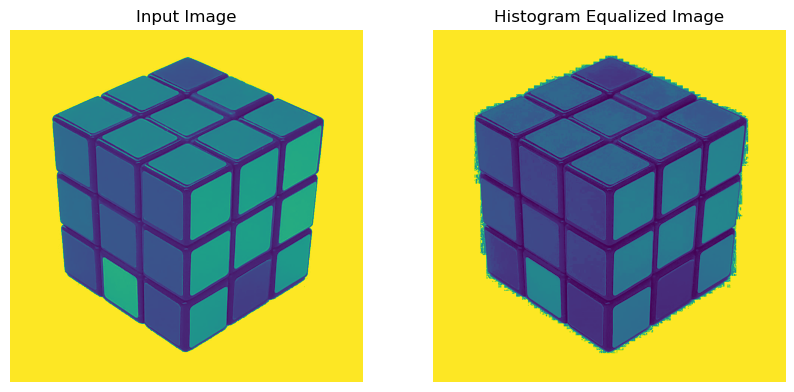

In [47]:
# 2. Compute equalized image

equal_im = imageEqualization(im)

im = skimage.io.imread('images/cube.jpg', as_gray=True)

im = (im * 255).astype(np.uint8)

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(1, 2, 1)
  
# showing image
plt.imshow(im)
plt.axis('off')
plt.title("Input Image")

fig.add_subplot(1, 2, 2)
  
# showing image
plt.imshow(equal_im)
plt.axis('off')
plt.title("Histogram Equalized Image")

**2. Explain your observations here:**

Color is distributed uniformly over the cube. Brightness has decreased. Contrast has increased.

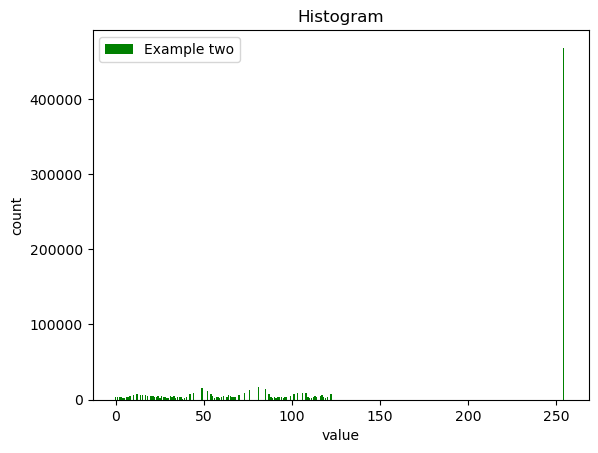

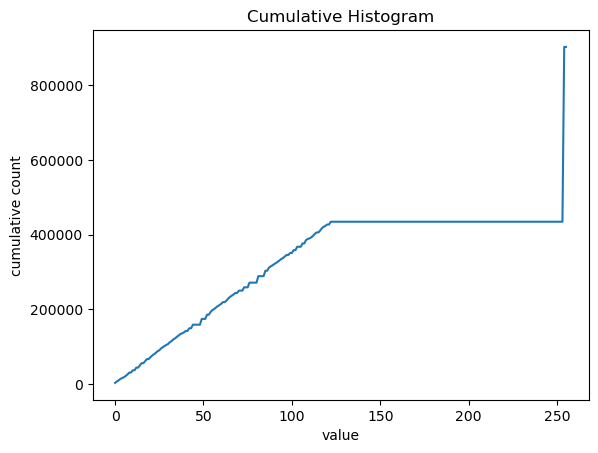

In [49]:
# 3. Compute the histogram and cumulative histogram of the equalized image

hist = histogram(equal_im)
cum_hist = cumulativeHistogram(hist)

plt.bar(np.arange(256),hist[:,0], label="Example two", color='g')
plt.legend()
plt.xlabel('value')
plt.ylabel('count')

plt.title('Histogram')

plt.show()

plt.plot(np.arange(256), cum_hist[:,0])
plt.xlabel('value')
plt.ylabel('cumulative count')

plt.title('Cumulative Histogram')

plt.show()


**3. Explain your observations here:**

The abruptness is gone, the graph is more smooth. Now the values are normalized with in a range.